In [1]:
import pandas as pd

In [12]:
data = pd.read_csv(
    filepath_or_buffer="Dataset/time-series/time_series_solar.csv",
    parse_dates=['Datetime'],
    index_col='Datetime'
)

series = data['Incoming Solar']

In [15]:
series.head()

Datetime
2007-10-01 00:00:00    0.0
2007-10-01 01:00:00    0.0
2007-10-01 02:00:00    0.0
2007-10-01 03:00:00    0.0
2007-10-01 04:00:00    0.0
Name: Incoming Solar, dtype: float64

In [22]:
series

Datetime
2007-10-01 00:00:00    0.0
2007-10-01 01:00:00    0.0
2007-10-01 02:00:00    0.0
2007-10-01 03:00:00    0.0
2007-10-01 04:00:00    0.0
                      ... 
2013-09-30 19:00:00    0.0
2013-09-30 20:00:00    0.0
2013-09-30 21:00:00    0.0
2013-09-30 22:00:00    0.0
2013-09-30 23:00:00    0.0
Name: Incoming Solar, Length: 52608, dtype: float64

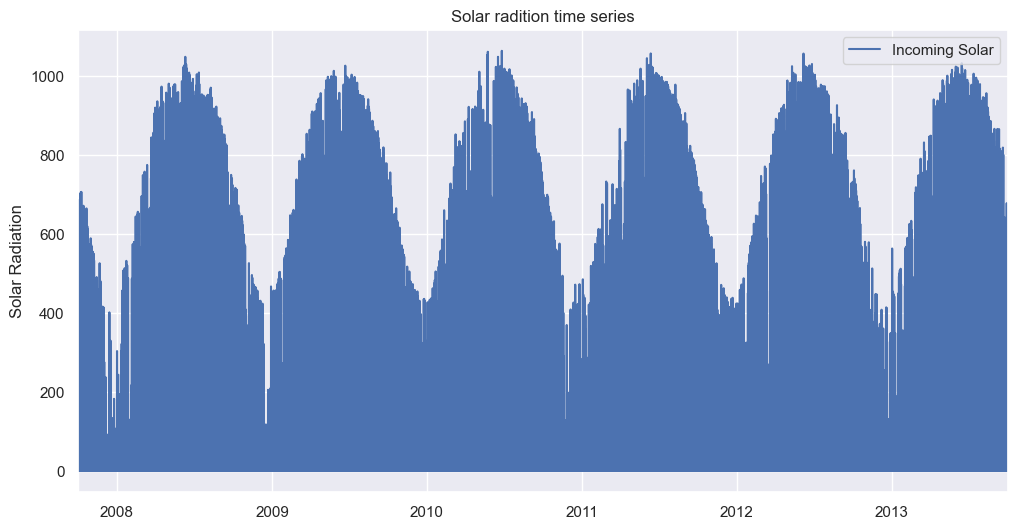

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

series.plot(
    figsize=(12, 6),
    title='Solar radiation time series'
)

series_df = series.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')

sns.lineplot(
    data=series_df,
    x='Datetime',
    y='Incoming Solar'
)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Solar radition time series')
plt.show()

[Text(0.5, 1.0, 'Daily sales count')]

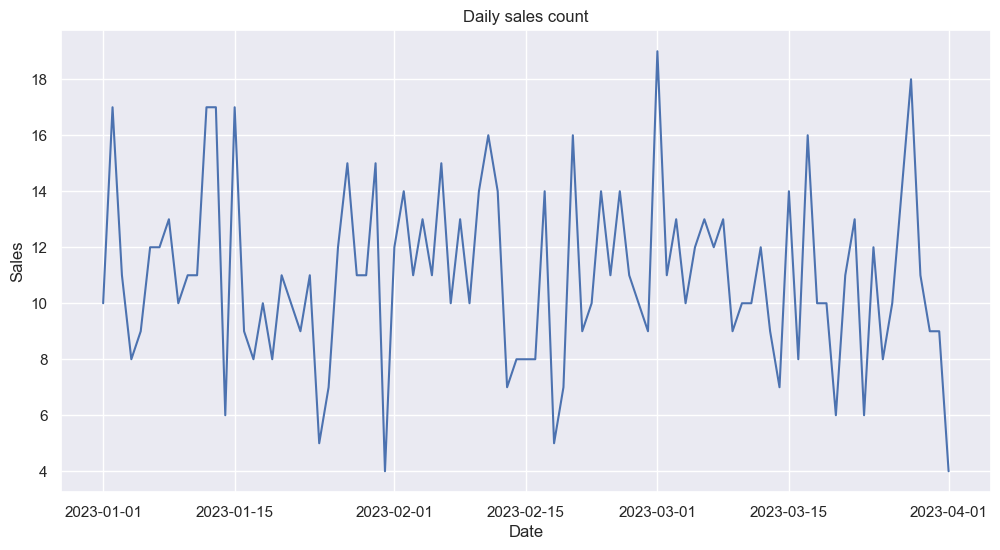

In [30]:
import numpy as np

n_sales = 1000
start = pd.Timestamp('2023-01-01 09:00')
end = pd.Timestamp('2023-04-01')
n_days = (end - start).days + 1

irregular_series = pd.to_timedelta(
    np.random.rand(n_sales) * n_days,
    unit='D'
) + start

sereis_sales = pd.Series(
    0,
    index=irregular_series
).resample('D').count()
sereis_sales.name = 'Sales'
sereis_sales.index.name = 'Date'

sns.lineplot(
    x='Date',
    y='Sales',
    data=sereis_sales.reset_index()
).set(title='Daily sales count')

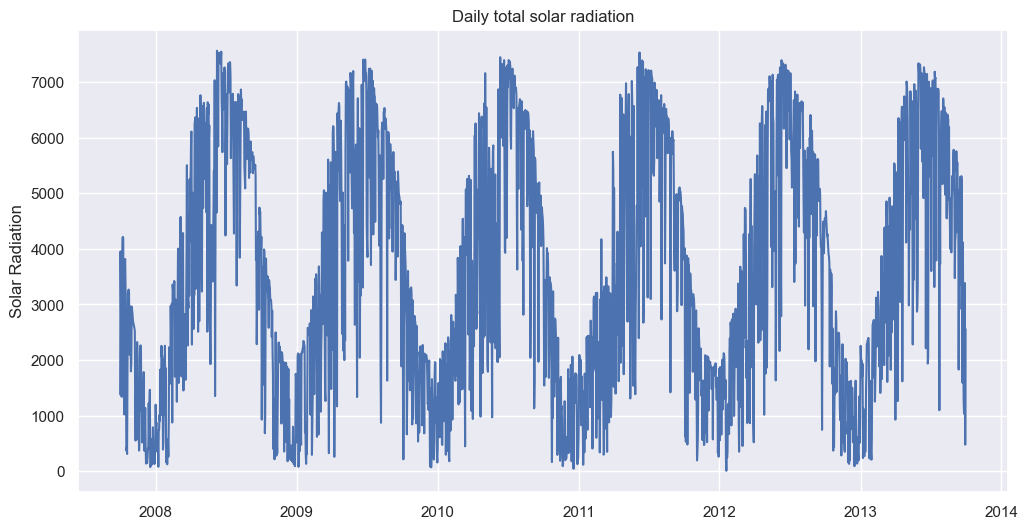

In [31]:
series_daily = series.resample('D').sum()

series_df = series_daily.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')

sns.lineplot(x='Datetime',
             y='Incoming Solar',
             data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Daily total solar radiation')
plt.show()

C:\Users\vinhn\AppData\Local\Temp\ipykernel_17348\352968457.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sample_with_nan[idx] = np.nan


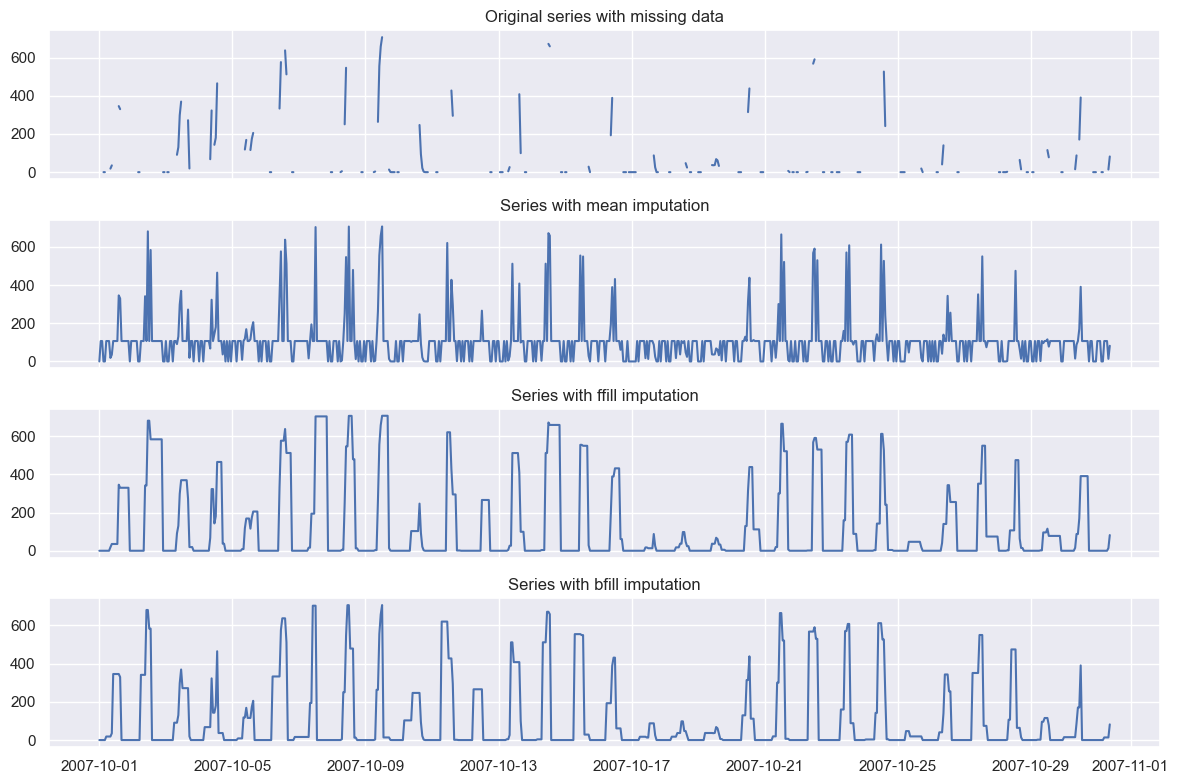

In [32]:
sample_with_nan = series.head(365 * 2).copy()

size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

sample_with_nan[idx] = np.nan

# imputation with mean value
avg_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(avg_value)
# imputation with last known observation
imp_ffill = sample_with_nan.ffill()
# imputation with next known observation
imp_bfill = sample_with_nan.bfill()

plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
# fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')

plt.tight_layout()
